In [32]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
import pandas as pn
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import math
from sklearn.model_selection import RandomizedSearchCV,train_test_split
import torch
from sklearn.metrics import balanced_accuracy_score
from mpl_toolkits import mplot3d
import scipy.interpolate as interp
from mpl_toolkits.mplot3d import Axes3D
rf = RandomForestClassifier(random_state = 12)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 12,
 'verbose': 0,
 'warm_start': False}


In [0]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from nltk.corpus import stopwords
import pandas
#import preprocesamiento #los metodos de preprocesamiento.py reciben datos en la forma: data.values donde data
                        #es producto de leer csv con pandas.read_csv
import torch as tr

class BOW():
    def __init__(self,dataset,strip_accents,stoplist,weighting,ngram = None):
        #autocorregir -> lematizar -> borrar signos, carac especiales, stopwords, pasar a minuscula
        #x_text_auto = preprocesamiento.Autocorrector(dataset.values)
        #x_text_lem = preprocesamiento.Lematizar(dataset)
        #x_text_lem = x_text_lem[:,1]
        #x_text_lem = dataset[:,1] esto anda
        if weighting:
            if ngram: 
                vectorizer = TfidfVectorizer(strip_accents=strip_accents,stop_words=stoplist,ngram_range=ngram) 
            else:
                vectorizer = TfidfVectorizer(strip_accents=strip_accents,stop_words=stoplist)   
        else:
            if ngram:
                vectorizer = CountVectorizer(strip_accents=strip_accents,stop_words=stoplist,ngram_range=ngram)     
            else: 
                vectorizer = CountVectorizer(strip_accents=strip_accents,stop_words=stoplist)
        #X = vectorizer.fit_transform(x_text_lem)  
        X = vectorizer.fit_transform(dataset)
        self.vectorizer = vectorizer
        self.X = X

    def get_vocab(self):
        return(self.vectorizer.get_feature_names())


In [26]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1000, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(50, 150, num = 15)]
#max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'random_state': [12]}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [50,
               57,
               64,
               71,
               78,
               85,
               92,
               100,
               107,
               114,
               121,
               128,
               135,
               142,
               150],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [2, 4],
 'min_samples_split': [2, 5, 10, 15],
 'n_estimators': [1000, 1111, 1222, 1333, 1444, 1555, 1666, 1777, 1888, 2000],
 'random_state': [12]}


In [35]:
import nltk
nltk.download('stopwords')
correctedData = pn.read_csv("preprocessedQuestions_stem_completadas.csv",delimiter=',',header=None) #comentar esta linea en caso de descomentar la anterior
cantidad_preg = correctedData.shape[0]
correctedData = correctedData.values
print(type(correctedData))
print(correctedData.dtype)
#Xtrain_text,trainY_RF,Xtest_text,testY_RF,_,_ = utils.separate_dataset(correctedData,cantidad_preg,validation=False)
# print('Hasta acá todo ok')
# Instantiate model 
stoplist = stopwords.words('spanish')
#print(Xtrain_text.shape)
bow_unigram = BOW(correctedData[:,1],'ascii',stoplist,weighting = True)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<class 'numpy.ndarray'>
object


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['eramos', 'estabamos', 'estais', 'estan', 'estara', 'estaran', 'estaras', 'estare', 'estareis', 'estaria', 'estariais', 'estariamos', 'estarian', 'estarias', 'esteis', 'esten', 'estes', 'estuvieramos', 'estuviesemos', 'fueramos', 'fuesemos', 'habeis', 'habia', 'habiais', 'habiamos', 'habian', 'habias', 'habra', 'habran', 'habras', 'habre', 'habreis', 'habria', 'habriais', 'habriamos', 'habrian', 'habrias', 'hayais', 'hubieramos', 'hubiesemos', 'mas', 'mia', 'mias', 'mio', 'mios', 'seais', 'sera', 'seran', 'seras', 'sere', 'sereis', 'seria', 'seriais', 'seriamos', 'serian', 'serias', 'si', 'tambien', 'tendra', 'tendran', 'tendras', 'tendre', 'tendreis', 'tendria', 'tendriais', 'tendriamos', 'tendrian', 'tendrias', 'teneis', 'tengais', 'tenia', 'teniais', 'teniamos', 'tenian', 'tenias', 'tuvier

In [7]:
Y = np.zeros((cantidad_preg),dtype=np.int64)
for i in range(cantidad_preg):
    Y[i] = correctedData[i,0]

Y = torch.from_numpy(Y)
print(Y)


tensor([  0,   0,   0,  ..., 105, 105, 105])


In [0]:
# Number of trees in random forest
n_estimators = []
# Number of features to consider at every split
max_features = []
# Maximum number of levels in tree
max_depth= []
# Minimum number of samples required to split a node
min_samples_split = []
# Minimum number of samples required at each leaf node
min_samples_leaf = []
# Method of selecting samples for training each tree
bootstrap = []
score=[]
std=[]
bootstrap=[]
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                results['mean_test_score'][candidate],
                results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            score.append(results['mean_test_score'][candidate])
            std.append(results['std_test_score'][candidate])
            n_estimators.append(results['params'][candidate]['n_estimators'])
            max_features.append(results['params'][candidate]['max_features'])
            max_depth.append(results['params'][candidate]['max_depth'])
            min_samples_split.append(results['params'][candidate]['min_samples_split'])
            min_samples_leaf.append(results['params'][candidate]['min_samples_leaf'])
            bootstrap.append(results['params'][candidate]['bootstrap'])
            


In [36]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
#rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
print(type(bow_unigram.X))
print(type(Y))
Y_numpy = Y.numpy()
X_numpy = bow_unigram.X.toarray()
X_train,X_test,y_train,y_test = train_test_split(X_numpy,Y_numpy,shuffle=True,stratify=Y_numpy,test_size=0.1,random_state=12)
candidatos = 40
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = candidatos, cv = 10, verbose=2, random_state=12, n_jobs = -1,scoring='balanced_accuracy')
# Fit the random search model
y_test_tensor = torch.LongTensor(y_test)
#from collections import Counter
#count = Counter(y_train)
#print(sorted(count.items(), key=lambda pair: pair[1], reverse=True))

rf_random.fit(X_train, y_train)

<class 'scipy.sparse.csr.csr_matrix'>
<class 'torch.Tensor'>
Fitting 10 folds for each of 40 candidates, totalling 400 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 22.7min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 50.4min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed: 55.4min finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of th

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=Non

In [37]:
report(rf_random.cv_results_,candidatos) 


Model with rank: 1
Mean validation score: 0.636 (std: 0.034)
Parameters: {'random_state': 12, 'n_estimators': 1444, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 114, 'bootstrap': False}

Model with rank: 2
Mean validation score: 0.635 (std: 0.033)
Parameters: {'random_state': 12, 'n_estimators': 2000, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 142, 'bootstrap': False}

Model with rank: 3
Mean validation score: 0.635 (std: 0.034)
Parameters: {'random_state': 12, 'n_estimators': 1888, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 128, 'bootstrap': False}

Model with rank: 4
Mean validation score: 0.635 (std: 0.034)
Parameters: {'random_state': 12, 'n_estimators': 1555, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 92, 'bootstrap': False}

Model with rank: 5
Mean validation score: 0.632 (std: 0.034)
Parameters: {'random_state': 12, 'n_

In [38]:
print("n_estimators=", n_estimators)
print("max_features=",max_features)
print("max_depth=",max_depth)
print("min_samples_split=",min_samples_split)
print("min_samples_leaf=",min_samples_leaf)
print("bootstrap",bootstrap)
print("score=",score)
print("std=",std)

probs = rf_random.best_estimator_.predict_proba(X_test)
acc = balanced_accuracy_score(y_test_tensor,np.argmax(probs,axis=1))
print("tasa de acierto obtenida: ",acc)

n_estimators= [1888, 1222, 2000, 1000, 1000, 1444, 1555, 1555, 1444, 1888, 1888, 1555, 1333, 1555, 1888, 1555, 1888, 1888, 2000, 1888, 1888, 1888, 1555, 1555, 1333, 1555, 1555, 1666, 1666, 1444, 1111, 1333, 1333, 2000, 2000, 1444, 1444, 2000, 1888, 1333, 1444, 2000, 1888, 1555, 1222, 1555, 1444, 1000, 1000, 1333, 1888, 1888, 1555, 1555, 1888, 1888, 1555, 1888, 2000, 1888, 1555, 1555, 1333, 1666, 1666, 1444, 1111, 1555, 1555, 1888, 1888, 1333, 2000, 2000, 2000, 1888, 1333, 1444, 1444, 1333]
max_features= ['auto', 'sqrt', 'sqrt', 'auto', 'auto', 'auto', 'auto', 'sqrt', 'auto', 'auto', 'sqrt', 'auto', 'auto', 'sqrt', 'sqrt', 'auto', 'sqrt', 'auto', 'sqrt', 'sqrt', 'auto', 'sqrt', 'sqrt', 'auto', 'sqrt', 'sqrt', 'sqrt', 'auto', 'auto', 'auto', 'sqrt', 'auto', 'sqrt', 'sqrt', 'sqrt', 'sqrt', 'auto', 'auto', 'auto', 'sqrt', 'auto', 'sqrt', 'auto', 'sqrt', 'sqrt', 'auto', 'auto', 'auto', 'auto', 'auto', 'sqrt', 'auto', 'auto', 'auto', 'auto', 'sqrt', 'sqrt', 'sqrt', 'sqrt', 'sqrt', 'sqrt', 'a

[128, 128, 142, 121, 142, 107, 142, 92, 114, 100, 135, 92, 107, 71, 64, 107, 78, 100, 50, 57, 142, 150, 85, 107, 57, 142, 150, 114, 85, 92, 78, 142, 150, 64, 100, 107, 121, 50, 57, 121, 114, 142, 128, 92, 128, 142, 107, 121, 142, 107, 135, 100, 92, 107, 100, 78, 71, 64, 50, 57, 85, 107, 142, 114, 85, 92, 78, 142, 150, 142, 150, 57, 50, 100, 64, 57, 150, 107, 121, 121]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Z contains NaN values. This may result in rendering artifacts.
/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


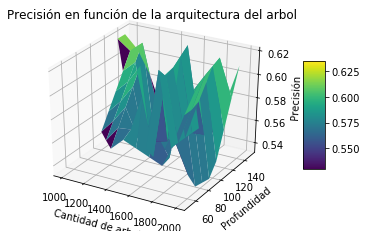

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: UserWarning: Z contains NaN values. This may result in rendering artifacts.


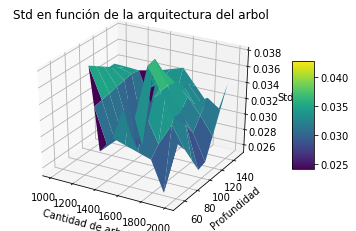

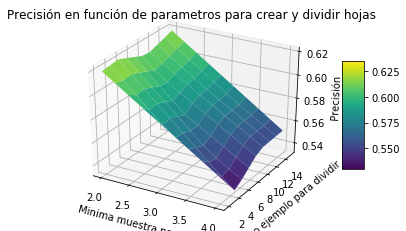

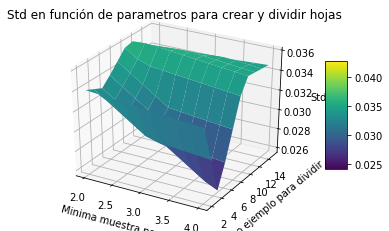

In [39]:
max_depth = list(map(lambda x: int(x) if x is not None else 70,max_depth))
print(max_depth)
ejex = n_estimators
ejey = max_depth
#print(ejez)
#print(len(ejez))
#ejez = [0.5,0.3,0.4,0.33,0.6,0.45,0.75,0.8,0.2,0.47,0.56,0.66,0.9,0.87,0.67,0.43]
ejez = score
plotx,ploty, = np.meshgrid(np.linspace(np.min(ejex),np.max(ejex),10),\
                           np.linspace(np.min(ejey),np.max(ejey),10))
plotz = interp.griddata((ejex,ejey),ejez,(plotx,ploty),method='linear')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Cantidad de arboles')
ax.set_ylabel('Profundidad')
ax.set_zlabel('Precisión')
ax.set_title('Precisión en función de la arquitectura del arbol')
surf = ax.plot_surface(plotx,ploty,plotz,vmin=np.nanmin(ejez),vmax = np.nanmax(ejez),cstride=1,rstride=1,cmap='viridis')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.savefig("pruebarf_estimators_depth_Precision.svg")
plt.show()

###############################################################################################################
ejex = n_estimators
ejey = max_depth
#print(ejez)
#print(len(ejez))
#ejez = [0.5,0.3,0.4,0.33,0.6,0.45,0.75,0.8,0.2,0.47,0.56,0.66,0.9,0.87,0.67,0.43]
ejez = std
plotx,ploty, = np.meshgrid(np.linspace(np.min(ejex),np.max(ejex),10),\
                           np.linspace(np.min(ejey),np.max(ejey),10))
plotz = interp.griddata((ejex,ejey),ejez,(plotx,ploty),method='linear')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Cantidad de arboles')
ax.set_ylabel('Profundidad')
ax.set_zlabel('Std')
ax.set_title('Std en función de la arquitectura del arbol')
surf = ax.plot_surface(plotx,ploty,plotz,vmin=np.nanmin(ejez),vmax = np.nanmax(ejez),cstride=1,rstride=1,cmap='viridis')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.savefig("pruebarf_estimators_depth_std.svg")
plt.show()

####################################################################################################################
ejex = min_samples_leaf
ejey = min_samples_split
#print(ejez)
#print(len(ejez))
#ejez = [0.5,0.3,0.4,0.33,0.6,0.45,0.75,0.8,0.2,0.47,0.56,0.66,0.9,0.87,0.67,0.43]
ejez = score
plotx,ploty, = np.meshgrid(np.linspace(np.min(ejex),np.max(ejex),10),\
                           np.linspace(np.min(ejey),np.max(ejey),10))
plotz = interp.griddata((ejex,ejey),ejez,(plotx,ploty),method='linear')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Minima muestra para hoja')
ax.set_ylabel('Minimo ejemplo para dividir')
ax.set_zlabel('Precisión')
ax.set_title('Precisión en función de parametros para crear y dividir hojas')
surf = ax.plot_surface(plotx,ploty,plotz,vmin=np.nanmin(ejez),vmax = np.nanmax(ejez),cstride=1,rstride=1,cmap='viridis')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.savefig("pruebarf_minsampleasleaf_minsamplessplit_Precision.svg")
plt.show()

##################################################################################################################
ejex = min_samples_leaf
ejey = min_samples_split
#print(ejez)
#print(len(ejez))
#ejez = [0.5,0.3,0.4,0.33,0.6,0.45,0.75,0.8,0.2,0.47,0.56,0.66,0.9,0.87,0.67,0.43]
ejez = std
plotx,ploty, = np.meshgrid(np.linspace(np.min(ejex),np.max(ejex),10),\
                           np.linspace(np.min(ejey),np.max(ejey),10))
plotz = interp.griddata((ejex,ejey),ejez,(plotx,ploty),method='linear')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Minima muestra para hoja')
ax.set_ylabel('Minimo ejemplo para dividir')
ax.set_zlabel('Std')
ax.set_title('Std en función de parametros para crear y dividir hojas')
surf = ax.plot_surface(plotx,ploty,plotz,vmin=np.nanmin(ejez),vmax = np.nanmax(ejez),cstride=1,rstride=1,cmap='viridis')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.savefig("pruebarf_minsampleasleaf_minsamplessplit_std.svg")
plt.show()